###  Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import re
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Loading the dataset

In [2]:
data = pd.read_csv("../data/SMSSpamCollection.tsv", names=['label', 'body_text'], sep='\t')

data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
data.rename(columns={"body_text":"email"} , inplace=True)

In [4]:
data.head()

,label,email
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

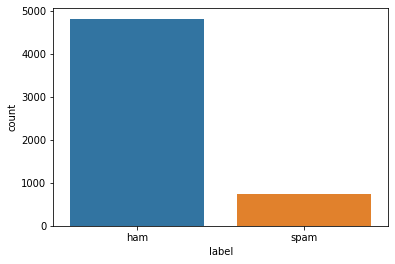

In [6]:
sns.countplot(data['label'])

### Preprocessing the dataset

In [7]:

def lower_text(row):

    return row.lower()

 

def clean_text(text):
    tokens = re.split('\W+', text)
    text = " ".join(word  for word in tokens  if word not in string.punctuation)
    return text

In [8]:
data["email"] = data["email"].apply(lower_text)

In [9]:
data["email"] = data["email"].apply(clean_text)

In [10]:
data["label"] = data["label"].map(lambda  i : 1 if i=="spam" else 0)

In [11]:
data.head()

,label,email
0,0,i ve been searching for the right words to tha...
1,1,free entry in 2 a wkly comp to win fa cup fina...
2,0,nah i don t think he goes to usf he lives arou...
3,0,even my brother is not like to speak with me t...
4,0,i have a date on sunday with will


### Splitting the dataset into the Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data["email"], data["label"], test_size = 0.2, random_state = 10)

In [13]:
v = CountVectorizer()
v.fit(X_train)  #build vocabulary from the messages in the data
# print(v.vocabulary_)

CountVectorizer()

In [14]:
train_df = v.transform(X_train)
test_df = v.transform(X_test)

###  Training Logistic Regression

In [15]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_df,y_train)

LogisticRegression()

In [16]:
predictions= model.predict(test_df)
accuracy_score(y_test,predictions)

0.9793536804308797

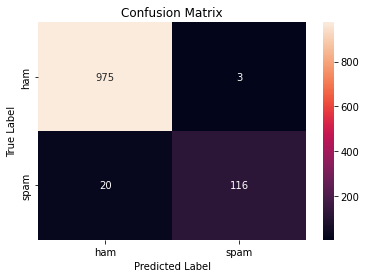

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
from sklearn.linear_model import Perceptron
model_perc = Perceptron()
model_perc.fit(train_df,y_train)
predictions_perc= model_perc.predict(test_df)
accuracy_score(y_test,predictions_perc)

0.9793536804308797

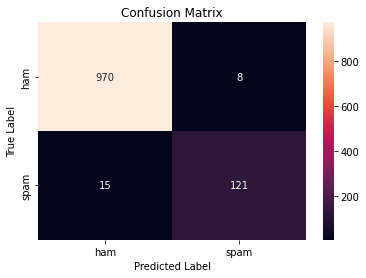

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_perc)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
#save the model after training 

joblib.dump(model , "../models/my_model2.pkl")

['../models/my_model2.pkl']